# Species prediction from DNA sequence data


# Project Introduction

For this project my main focus was going to be demonstrating classification models and methods. To pick an example, I decided to research DNA sequencing analysis, because I thought it would be interesting, and the data that is available publicly is astonishingly immense. 

DNA is found in the cells of every living thing on Earth. Scientists can study the DNA of organisms to understand more about the function of an organism, or analyze the DNA to determine if they have found a new species.

DNA classification has many uses - from species identification to differentiation, research can provide insights on how different one species is from another, or how one species evolved over time. Genetic sequence analysis can identify the differences in gene, insertions and deletions within subsets of the DNA, or identifying the change in phenotypes from species to species. Analysis of the differences in the sequences from differents species can tell us a lot about the differences between species, but also how similiar all organisms are.

### Hypothesis:

What if I could take DNA information from a certain genome and compare to others? Would there be a signal in the noise? Of course, there would be and there is, but I started with a null hypothesis in question: Could these genomes be unrelated and basically random next to each other?

Alternatively, I hope to find there is a pattern of similarity, and I hope that will be measured in the metrics of my model. I am no biologist, but as a data scientist, I will be viewing this problem as one of loss - observing the similiarities between genomes and explaining the variance between them by predicting their respective class. From a techinical point of view, this project will use machine learning methods to analyze and classify the DNA sequences from different species. The results of this model will be used to predict the species of a given set of classes based on the genetic sequence alone. This project will focus primarily on the mathematical differences between sequences in genetic code, rather than any special genetic analysis of genes and phenotypes between species. I am interested in the problem of how similiar or different two species may be from one other, from a generalized and statisical point of view.


# What is DNA?

DNA, or deoxyribonucleic acid, is a molecule that contains the inherited code used by cells in an organism to generate  proteins. It is found in the nucleus of cells. DNA consists of four bases: adenine or A, cytosine or C, guanine or G, and thymine or T. Each strand of DNA is actually composed of two strands that are held together by a sugar based structure in the shape of a double helix. Each base is connected to the opposite strand by its complementary base: A always connects to T, C always connects to G, G always connects to C, and T always connects to A. This means that each complementary strand of DNA is like a reflection of the other. When DNA is sequenced into a string composed of the four bases, only one string has been catalogued in the data we are reading, without its complement.

Through complicated biological and molecular processes, DNA replicates or creates copies of itself known as mRNA. mRNA strands are short segmented copies of the DNA that can recombine with other segments of mRNA and in turn create combinations that are code for creating proteins. Different combinations create different proteins and these proteins are then used throughout the cell and the organism. DNA acts like computer code for creating the proteins like a program and thus why it is referred to as genetic code, or 'the building blocks of life'. Subsets of DNA strands can be identified for creating specific proteins and these are known as genes.

The DNA in every cell is coiled up tightly together, and although it takes up a microscopic amount of space, it is very long. If you carefully unraveled a entire strand of Human DNA it would be about 1.8 meters long, and contains 3 billion base pairs i.e. combinations of A, C, G, and T.

Advances in technology have allowed scientists to sequence the microscopic data within a small margin of error. The total number of genes in one species is known as that species' genome. The Human Genome Project, ongoing from 1990 to completion in 2003, and mapped the enitre human genome across about 20,000 non-overlapping samples.(fact check) Today, there are many different species genomes mapped and publicly available to download for research and analysis.

# Common DNA sequence feature engineering methods

Genomics is a broad field of study that classifies, analyzes, and maps genomes of organisms. Within genomic data science, there are many ways that machine learning can be used to analyse sequence data.

If taking a strand of DNA as input, a string may appear as a combination of A, C, G, and T character, such as:
'ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAAT...'

This strand may identify a specific gene in the selected genome and/or may be a variable length. There are few common ways that genomic data scientists encode this sequence as features in a model.

One way is to one-hot encode each character in the sequence. One-hot encoding creates 4 features for every character where A may equal [1,0,0,0] and C may equal [0,1,0,0] and so on. Those 4 features are created for every character in the sequence.

Another common method to use, especially if the length of the sequence is variable, is called minhash. [Minhash](https://en.wikipedia.org/wiki/MinHash) (other link to it?) is a computer science method of comparing the similarity between two sets. In bioinformatics, minhash can be used to transform a sequence into a frequency dictionary of k-length substrings called [k-mers](https://en.wikipedia.org/wiki/K-mer) of a given integer k. First, columns are created for all possible k-mers of genetic code and then populated on every index in the string. For example a string 'gtatca' could be converted in k-mer of k=2 by extracting all substrings of length 2 along the string: from 'gtatca' would populate 'gt', 'ta', 'at', 'tc', and 'ca' columns.

In this project, we will only use the minhash method to create all of our features used in the model.



# Import libraries

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from Bio import SeqIO
from itertools import permutations
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, roc_curve, auc, plot_confusion_matrix
from sklearn import set_config
set_config(display= 'diagram')
from xgboost import XGBClassifier
from joblib import parallel_backend
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# Import DNA sequences

I will be using the BioPython library to parse through fasta files found on the [RefSeq database](https://www.ncbi.nlm.nih.gov/refseq/). Let's look at one record as an example of the data that is being parsed in.

In [4]:
for seq_record in SeqIO.parse("data/GCF_000001405.40_GRCh38.p14_cds_from_genomic.fna", "fasta"): #human fasta file
    print(seq_record)
    break #break after printing one record

ID: lcl|NC_000001.11_cds_NP_001005484.2_1
Name: lcl|NC_000001.11_cds_NP_001005484.2_1
Description: lcl|NC_000001.11_cds_NP_001005484.2_1 [gene=OR4F5] [db_xref=CCDS:CCDS30547.1,Ensembl:ENSP00000493376.2,GeneID:79501] [protein=olfactory receptor 4F5] [protein_id=NP_001005484.2] [location=join(65565..65573,69037..70008)] [gbkey=CDS]
Number of features: 0
Seq('ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGAGTGAAACG...TAG')


This project will be using using the sequence (Seq) as data in the model, but let's define a helper function that will collect a few more columns of data, just in case we want to reference them later.

In [5]:
def parse_from_genome_file(filename, target_name, n=None):
    
    i=0
    seqs = []
    genes = []
    proteins = []
    target = []
    
    for seq_record in SeqIO.parse(filename, "fasta"):
        
        seqs.append(''.join(seq_record.seq)) #append the sequence data
        genes.append(seq_record.description.split('[')[1][5:-2]) #append gene name
        proteins.append(seq_record.description.split('[')[3][8:-2]) #append protein description
        target.append(target_name) #append the class name ('human' or otherwise)
        
        if n != None:
            if i < n:
                i+=1
            if i >= n:
                break
            
    df = pd.concat([pd.DataFrame(seqs),pd.DataFrame(genes), pd.DataFrame(proteins), pd.DataFrame(target)], axis=1)
    df.columns = ['seq','gene','protein', 'target']
    
    return df

In [6]:
#create dataframes for each genome file
human_df = parse_from_genome_file("data/GCF_000001405.40_GRCh38.p14_cds_from_genomic.fna", 'human', n=20000)
chimp_df = parse_from_genome_file('data/GCF_002880755.1_Clint_PTRv2_cds_from_genomic.fna', 'chimp', n=20000)
bonobo_df = parse_from_genome_file('data/GCF_013052645.1_Mhudiblu_PPA_v0_cds_from_genomic.fna', 'bonobo', n=20000)
dolphin_df = parse_from_genome_file('data/GCF_011762595.1_mTurTru1.mat.Y_cds_from_genomic.fna', 'dolphin', n=20000)
oak_df = parse_from_genome_file('data/GCF_001633185.2_ValleyOak3.2_cds_from_genomic.fna', 'oak', n=20000)
mushroom_df = parse_from_genome_file('data/GCF_017499595.1_MGC_Penvy_1_cds_from_genomic.fna', 'mushroom', n=20000)

In [7]:
human_df.head()

,seq,gene,protein,target
0,ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGA...,OR4F5,olfactory receptor 4F5,human
1,ATGCCTAGACACACACATCCTTACTCTGCGTGCATCCCTGGCCTGG...,LOC112268260,uncharacterized protein LOC112268260,human
2,ATGGATGGAGAGAATCACTCAGTGGTATCTGAGTTTTTGTTTCTGG...,OR4F29,olfactory receptor 4F3/4F16/4F29,human
3,ATGCGTAGACACACACATCCTTACTCTGCGCGCATCCCTGGCCTGG...,LOC105378947,proline-rich extensin-like protein EPR1 isofor...,human
4,ATGGATGGAGAGAATCACTCAGTGGTATCTGAGTTTTTGTTTCTGG...,OR4F16,olfactory receptor 4F3/4F16/4F29 isoform X1,human


Let's look a the first DNA sequence in its total length.

In [8]:
human_df.loc[0,'seq']

'ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGAGTGAAACGAATAACTCTATGGTGACTGAATTCATTTTTCTGGGTCTCTCTGATTCTCAGGAACTCCAGACCTTCCTATTTATGTTGTTTTTTGTATTCTATGGAGGAATCGTGTTTGGAAACCTTCTTATTGTCATAACAGTGGTATCTGACTCCCACCTTCACTCTCCCATGTACTTCCTGCTAGCCAACCTCTCACTCATTGATCTGTCTCTGTCTTCAGTCACAGCCCCCAAGATGATTACTGACTTTTTCAGCCAGCGCAAAGTCATCTCTTTCAAGGGCTGCCTTGTTCAGATATTTCTCCTTCACTTCTTTGGTGGGAGTGAGATGGTGATCCTCATAGCCATGGGCTTTGACAGATATATAGCAATATGCAAGCCCCTACACTACACTACAATTATGTGTGGCAACGCATGTGTCGGCATTATGGCTGTCACATGGGGAATTGGCTTTCTCCATTCGGTGAGCCAGTTGGCGTTTGCCGTGCACTTACTCTTCTGTGGTCCCAATGAGGTCGATAGTTTTTATTGTGACCTTCCTAGGGTAATCAAACTTGCCTGTACAGATACCTACAGGCTAGATATTATGGTCATTGCTAACAGTGGTGTGCTCACTGTGTGTTCTTTTGTTCTTCTAATCATCTCATACACTATCATCCTAATGACCATCCAGCATCGCCCTTTAGATAAGTCGTCCAAAGCTCTGTCCACTTTGACTGCTCACATTACAGTAGTTCTTTTGTTCTTTGGACCATGTGTCTTTATTTATGCCTGGCCATTCCCCATCAAGTCATTAGATAAATTCCTTGCTGTATTTTATTCTGTGATCACCCCTCTCTTGAACCCAATTATATACACACTGAGGAACAAAGACATGAAGACGGCAATAAGACAGCTGAGAAAATGGGATGCACATTCTAGTGTAAAGTTTTAG'

I want to create all the features in my model from all the sequences like this. I will write a custom TransformerMixin class here to transform the 'seq' column to the k-mer frequency dictionaries (minhash?)and then convert this to a pandas dataframe.

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class KMerTransformer(TransformerMixin, BaseEstimator):
    """
    Sklearn Pipeline Transformer to create k-mer frequency columns.
    
    Parameters:
        k (int) : length of characters in each substring of the input DNA sequence.
        normalize (bool): True will scale each frequency by the total length of the input DNA sequence.
    
    Output:
        4^k number of columns for the frequency of each k-mer in the input DNA sequence.
    
    """
    
    def __init__(self, k, normalize=False):
        self.k = k
        self.normalize = normalize
        
    def fit(self, X):
        
        self.kmer_perms = self.__create_kmer_permutations(self.k)
        
        return self
        
    def transform(self, X):
        
        seqs = X['seq']
        X_trans = pd.DataFrame(seqs.apply(lambda x: self.__kmer_transform_seq(x, self.k, self.kmer_perms)).tolist(), index=seqs.index)
        
        return X_trans
    
    def fit_transform(self, X, y=None):
        
        return self.fit(X).transform(X)
    
    def __create_kmer_permutations(self, k):
        
        superstring = 'G' * k + 'A' * k + 'T' * k + 'C' * k
        kmer_perms = sorted([''.join(kmer) for kmer in set(permutations(superstring, k))])
        
        return kmer_perms
    
    def __kmer_transform_seq(self, seq, k, kmer_perms):
        
        kmer_freq = dict.fromkeys(kmer_perms, 0)
        
        for i in range(len(seq) - k):
            if self.normalize:
                kmer_freq[seq[i:i+k]] += 1/len(seq)
            else:
                kmer_freq[seq[i:i+k]] += 1

        return kmer_freq

# EDA

In [10]:
kmer_transformer = KMerTransformer(k=3)
species_compare_df = pd.concat([human_df, chimp_df, dolphin_df, oak_df], axis=0)
kmer_matrix = kmer_transformer.fit_transform(species_compare_df)
kmer_matrix = pd.concat([kmer_matrix, species_compare_df.target], axis=1)

In [11]:
kmer_matrix.head()

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,target
0,10,13,13,16,19,10,4,21,15,11,...,34,23,13,21,29,16,29,20,35,human
1,9,20,14,4,30,18,14,13,41,19,...,25,10,45,44,12,5,7,9,9,human
2,7,5,12,10,17,10,3,22,15,14,...,31,14,10,30,33,11,33,17,33,human
3,8,30,15,4,44,34,13,15,64,30,...,52,9,84,70,14,4,10,6,7,human
4,7,5,12,10,17,10,3,22,15,14,...,31,14,10,30,33,11,33,17,33,human


In [71]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=4)


mean_agg = kmer_matrix.groupby('target').agg(['mean'])
mean_max = mean_agg.max().max()
mean_min = mean_agg.min().min()
mean_agg_index = mean_agg.index
kmer_index = np.array([x[0] for x in mean_agg.columns]).reshape(16,4)
mean_agg = (np.array(mean_agg) - mean_min) / (mean_max - mean_min)

i = 1
for index in range(len(mean_agg)):
    array = np.array(mean_agg[index]).astype(float).reshape(16,4)
    fig.add_trace(
        go.Heatmap(
            z=array,
            colorscale='gray',
        ),
        row= 1, col= i,
    )
    for k in range(16):
        for j in range(4):
            fig.add_annotation(text=np.array(kmer_index).reshape(16,4)[k][j], x=j, y=k, showarrow=False, row=1, col=i)
    i+=1
fig.show()

# Train Test Split

We will want to do a multi-class model later on, but I will start with a 2 class dataframe to create a baseline model.

In [ ]:
baseline_df = pd.concat([human_df, oak_df], axis=0).reset_index(drop=True)

In [30]:
labeler = LabelEncoder()

X = baseline_df.drop(columns='target')
y = labeler.fit_transform(baseline_df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now that we have defined this custom transformer, and split the data into training and testing sets, I can transform the X's into the dataframe's we will use in the model. We will start the baseline model with k=3.

In [31]:
kmer_transformer = KMerTransformer(k=3)
%time X_train_trans = kmer_transformer.fit_transform(X_train)
%time X_test_trans = kmer_transformer.transform(X_test)

CPU times: user 11.4 s, sys: 82.9 ms, total: 11.4 s
Wall time: 11.4 s
CPU times: user 4.21 s, sys: 27.7 ms, total: 4.24 s
Wall time: 4.24 s


# Baseline Model

In [18]:
baseline_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
], verbose=True)
baseline_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))],
         verbose=True)

In [19]:
baseline_model.fit(X_train_trans, y_train)
y_preds = baseline_model.predict(X_test_trans)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.4s


              precision    recall  f1-score   support

       human       0.97      0.96      0.96      5021
         oak       0.96      0.97      0.97      4979

    accuracy                           0.96     10000
   macro avg       0.97      0.97      0.96     10000
weighted avg       0.97      0.96      0.96     10000



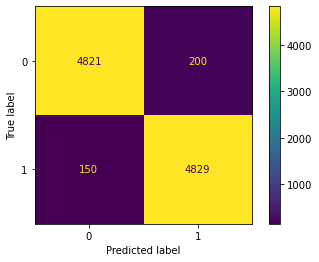

In [25]:
print(classification_report(labeler.inverse_transform(y_test), labeler.inverse_transform(y_preds)))
plot_confusion_matrix(baseline_model, X_test_trans, y_test)
plt.show()

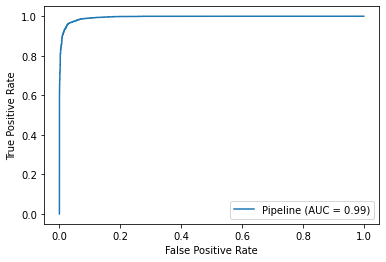

In [26]:
plot_roc_curve(baseline_model, X_test_trans, y_test)

This baseline model is working